In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc
from sklearn.preprocessing import LabelEncoder


In [2]:
data = pd.read_csv('../DATA/nan_remove_data.csv')
x = data.drop('Diabetes_012', axis=1)
y = data['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


In [3]:
lr = RandomizedSearchCV(LogisticRegression(penalty='l1', solver='saga'),
                        {'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
                         'warm_start': [True, False],
                         'multi_class': ['ovr', 'multinomial'],
                         },
                         n_iter=10,
                         n_jobs=4,
                         scoring='f1_micro',
                         random_state=71
                         ).fit(X_train, y_train)


[0.38701179 0.56455439 0.91560601 4.39010707 0.01019073 0.12522441
 0.2371402  0.0406767  0.04188697 0.0298089  0.6323324  0.08604898
 0.31862024 1.20314533 0.136887   0.12525662 0.13171656 0.15929281
 1.30121747 0.18496165 0.38541595]


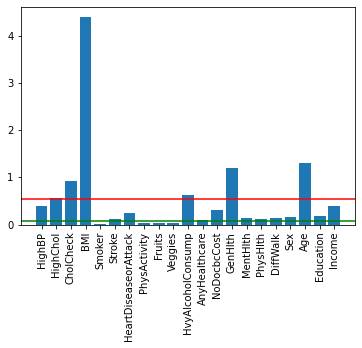

In [6]:
print(abs(lr.best_estimator_.coef_).max(axis=0))
plt.bar(x.columns, abs(lr.best_estimator_.coef_).max(axis=0))
plt.xticks(rotation=90)
plt.axhline(abs(lr.best_estimator_.coef_).max(axis=0).mean(), color='red')
plt.axhline(np.median(abs(lr.best_estimator_.coef_).mean(axis=0)), color='green')


In [7]:
med = np.median(abs(lr.best_estimator_.coef_).mean(axis=0))
useful_columns = x.columns.to_numpy()[abs(lr.best_estimator_.coef_).max(axis=0) >= med]
useful_columns


array(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke',
       'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Sex', 'Age', 'Education', 'Income'], dtype=object)

In [9]:
data[np.append(useful_columns.tolist(), 'Diabetes_012')].to_csv('../DATA/regression_remove_data.csv', index=False)
